No handles with labels found to put in legend.


[ 3.64559208  3.57659933  2.93811721  1.4357324  -0.25081047 -1.9499914
 -1.9499914  -1.9499914  -1.9499914  -1.9499914  -1.9499914  -1.9499914
 -1.9499914  -1.9499914  -1.9499914  -1.9499914  -1.9499914  -1.9499914
 -1.9499914 ]


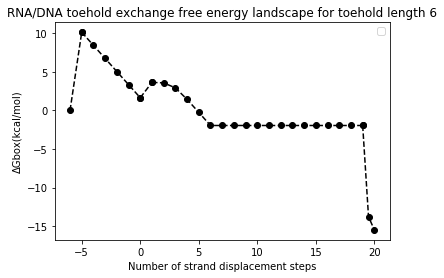

In [23]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
#define the dGbox
g = 6
b = 20
g2 = 6
#position of the mismatch
m = 6

R = 1.987/1000
temp = 298.15 
dGvol = 9.95 
dGassoc = 1.90
dGbp = -1.7
dGp = 2.0 
dGs= 5.3 
#downhill slope 
dGrd = - 1
#mismatch penalty/benefit 
dGmm = 5.6
k_uni = 7.5*10**7
k_bi = 3*10**6

dGboxAinc= 0
dGboxB1inc = dGassoc + dGvol + dGbp
dGboxBrinc = np.empty(g2)
for to in range(g2): 
    dGboxBrinc [to] = dGboxB1inc + dGbp*to
dGboxC1inc = dGassoc + dGvol + dGbp*g2
dGfray = np.empty(m-1)
dGn = np.empty(m-1)
for state in range(1, m): 
    dGclosed = dGmm
    dGfray[state - 1] = (m - state)*dGbp
    dGm = dGboxC1inc + R*temp *np.log(np.exp((m*dGbp)/(R*temp)) + np.exp(-(dGmm - dGp)/(R*temp)))
    dGn[state - 1] = dGm - (R*temp*np.log(np.exp(dGfray[state - 1]/(R*temp)) + np.exp((-dGmm)/(R*temp))))

dG_mis_pos = np.empty(b-1)
dG_mis_pos[:m-1] = dGn
dG_mis_pos[m-1:b] = dGm
print(dG_mis_pos)

#dGboxCrinc = np.empty(m-1)
#dGboxChinc = np.empty(m-1)
#dGboxCrincam = np.empty(b-m)
#dGboxChincam = np.empty(b-m)
#for br in range(m-1): 
    #dGboxChinc[br] = dGboxCh1inc - dGrd*br
    #dGboxCrinc[br] = dGboxChinc[br] - dGs
    #dGboxChincm = dGboxCrinc[m-2] + dGmm - (dGs) #- dGrd)
#for br in range(m-1, b-1): 
    #dGboxChincam[br-(m-1)] = dGboxChincm - dGrd*(br - (m-1))
    #dGboxCrincam[br-(m-1)] = dGboxChincam[br-(m-1)] - dGs
dGboxDinc = dGm
dGboxEinc = dGboxDinc - dGvol - dGassoc
dGboxFinc = dGboxEinc + dGbp


#dGboxCinc = np.empty(b*2)
#dGboxCinc[0:(m-1)*2] = [i for j in zip(dGboxChinc, dGboxCrinc) for i in j]
#dGboxCinc[(m-1)*2:(b-1)*2] = [i for j in zip(dGboxChincam, dGboxCrincam) for i in j]
dGboxAB1inc = [dGboxAinc, dGboxB1inc] 
dGboxC1Cr1inc = [dGboxC1inc, dG_mis_pos[0]]

plt.figure()

plt.plot(range(-g2,-g2+2), dGboxAB1inc, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black' )
plt.plot(range(-g2+1, 1), dGboxBrinc, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(np.arange(0, 2), dGboxC1Cr1inc, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot(np.arange(1, b), dG_mis_pos, 'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')
plt.plot([b-1, b-0.5, b], [dGboxDinc, dGboxEinc, dGboxFinc],'k--', marker = 'o', markerfacecolor = 'black', markeredgecolor = 'black')

plt.xlabel('Number of strand displacement steps')
plt.ylabel('\u0394Gbox(kcal/mol)')
plt.title('RNA/DNA toehold exchange free energy landscape for toehold length ' + str(g))
plt.legend()
plt.show()


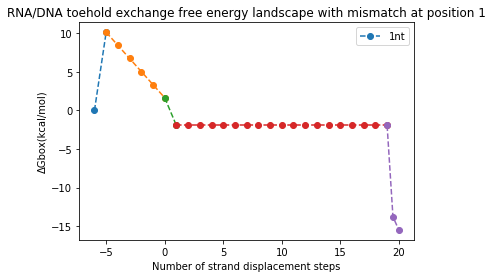

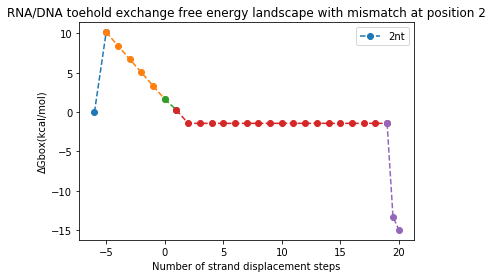

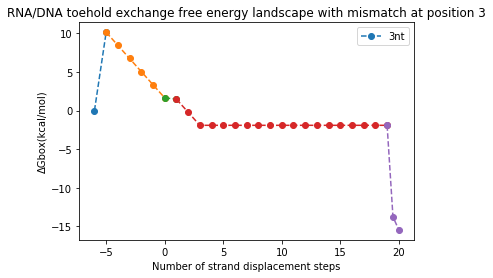

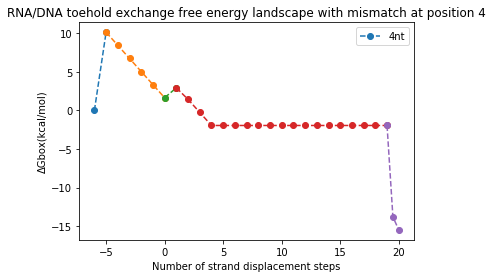

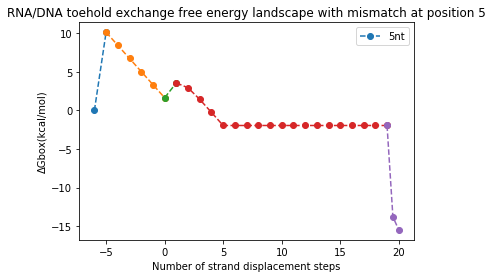

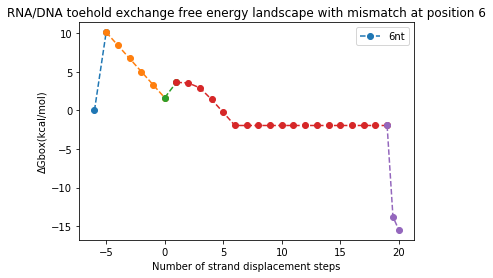

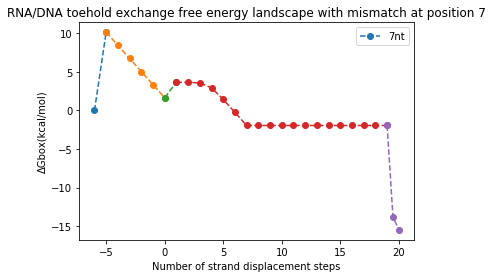

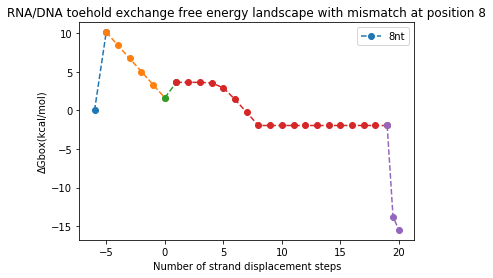

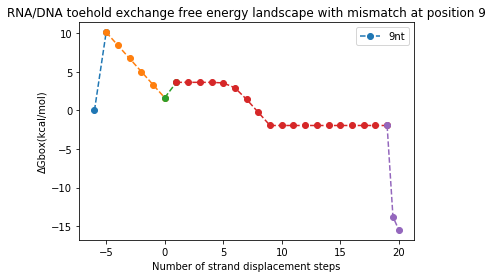

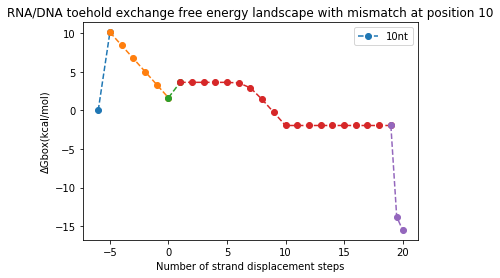

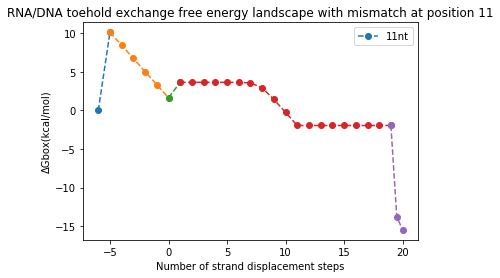

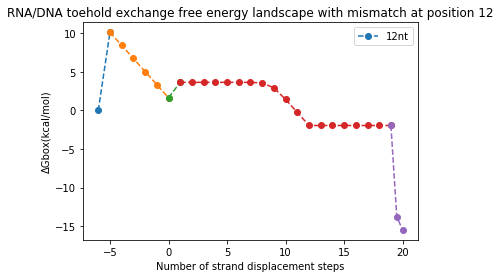

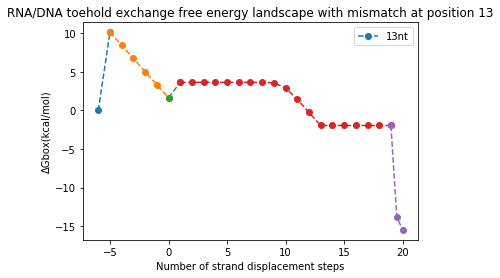

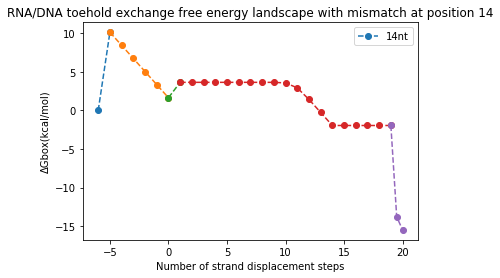

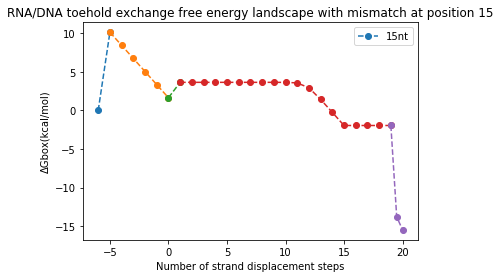

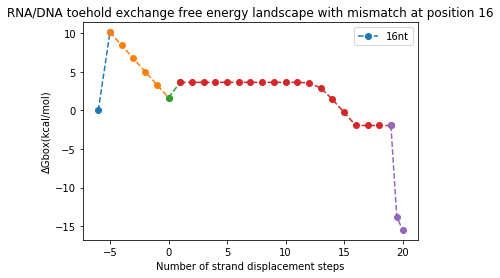

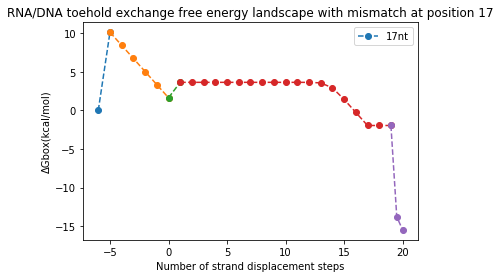

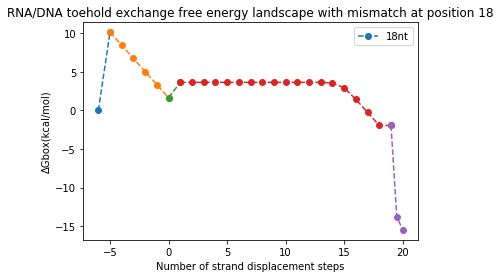

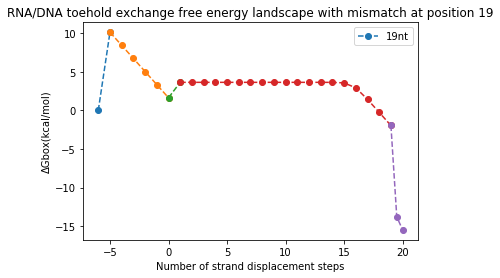

In [4]:
for m in range (1, 20):
    dGboxAinc= 0
    dGboxB1inc = dGassoc + dGvol + dGbp
    dGboxBrinc = np.empty(g2)
    for to in range(g2): 
        dGboxBrinc [to] = dGboxB1inc + dGbp*to
    dGboxC1inc = dGassoc + dGvol + dGbp*g2
    dGfray = np.empty(m-1)
    dGn = np.empty(m-1)
    for state in range(1, m): 
        dGclosed = dGmm
        dGfray[state - 1] = (m - state)*dGbp
        dGm = dGboxC1inc + R*temp *np.log(np.exp((m*dGbp)/(R*temp)) + np.exp(-(dGmm - dGp)/(R*temp)))
        dGn[state - 1] = dGm - (R*temp*np.log(np.exp(dGfray[state - 1]/(R*temp)) + np.exp((-dGmm)/(R*temp))))
        
    dG_mis_pos = np.empty(b-1)
    dG_mis_pos[:m-1] = dGn
    dG_mis_pos[m-1:b] = dGm
    
#dGboxCrinc = np.empty(m-1)
#dGboxChinc = np.empty(m-1)
#dGboxCrincam = np.empty(b-m)
#dGboxChincam = np.empty(b-m)
#for br in range(m-1): 
    #dGboxChinc[br] = dGboxCh1inc - dGrd*br
    #dGboxCrinc[br] = dGboxChinc[br] - dGs
    #dGboxChincm = dGboxCrinc[m-2] + dGmm - (dGs) #- dGrd)
#for br in range(m-1, b-1): 
    #dGboxChincam[br-(m-1)] = dGboxChincm - dGrd*(br - (m-1))
    #dGboxCrincam[br-(m-1)] = dGboxChincam[br-(m-1)] - dGs
    dGboxDinc = dGm
    dGboxEinc = dGboxDinc - dGvol - dGassoc
    dGboxFinc = dGboxEinc + dGbp


#dGboxCinc = np.empty(b*2)
#dGboxCinc[0:(m-1)*2] = [i for j in zip(dGboxChinc, dGboxCrinc) for i in j]
#dGboxCinc[(m-1)*2:(b-1)*2] = [i for j in zip(dGboxChincam, dGboxCrincam) for i in j]
    dGboxAB1inc = [dGboxAinc, dGboxB1inc] 
    dGboxC1Cr1inc = [dGboxC1inc, dG_mis_pos[0]]

    plt.figure()
    plt.plot(range(-g2,-g2+2), dGboxAB1inc, '--', marker = 'o', label = str(m) + 'nt' )
    plt.plot(range(-g2+1, 1), dGboxBrinc, '--', marker = 'o')
    plt.plot(np.arange(0, 2), dGboxC1Cr1inc, '--', marker = 'o')
    plt.plot(np.arange(1, b), dG_mis_pos, '--', marker = 'o')
    plt.plot([b-1, b-0.5, b], [dGboxDinc, dGboxEinc, dGboxFinc],'--', marker = 'o')

    plt.xlabel('Number of strand displacement steps')
    plt.ylabel('\u0394Gbox(kcal/mol)')
    plt.title('RNA/DNA toehold exchange free energy landscape with mismatch at position ' + str(m))
    plt.legend()
    plt.show()

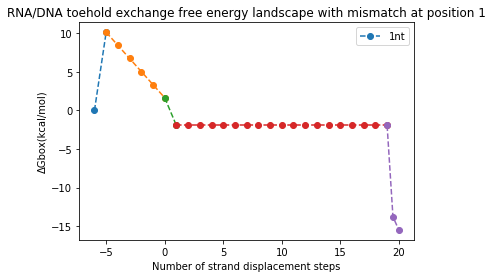

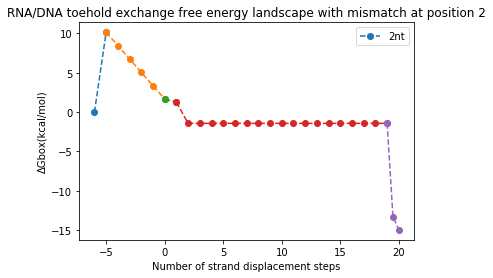

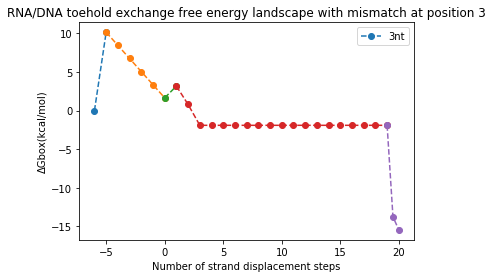

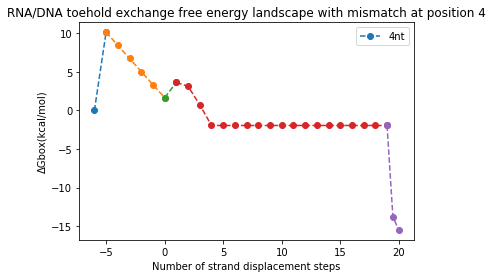

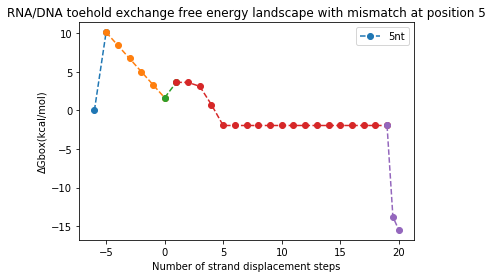

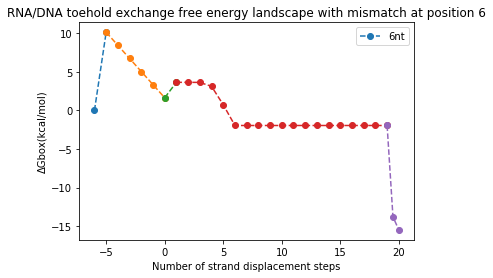

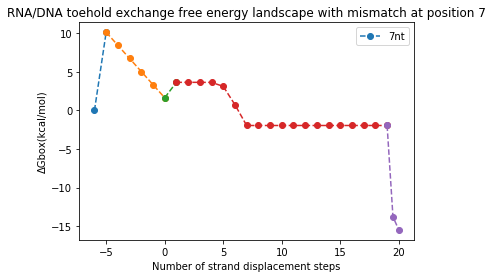

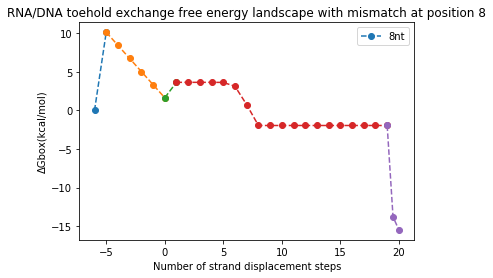

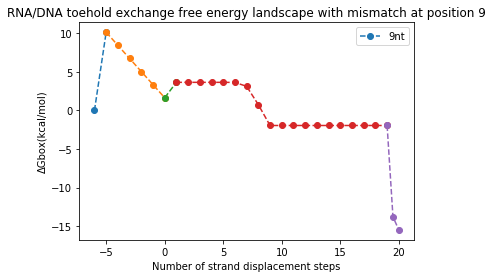

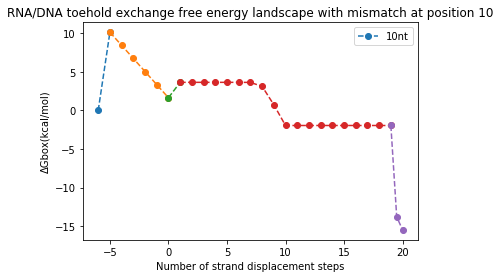

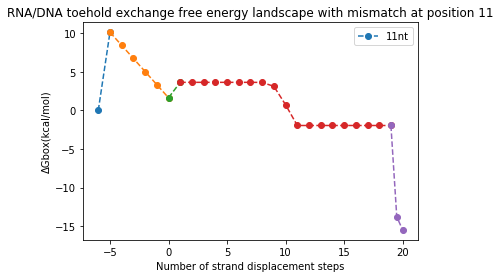

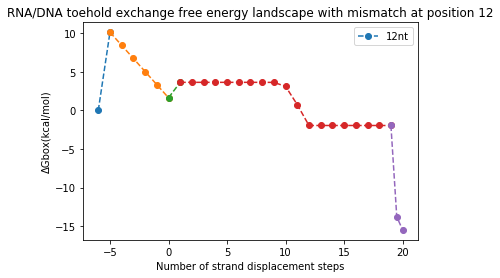

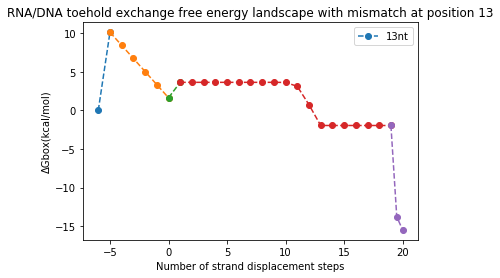

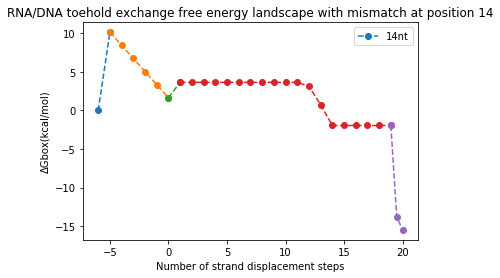

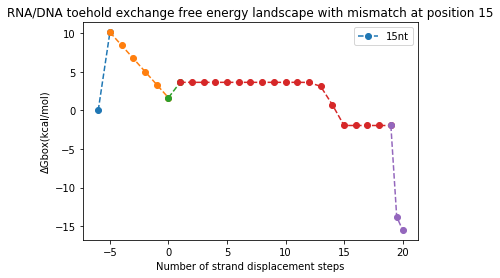

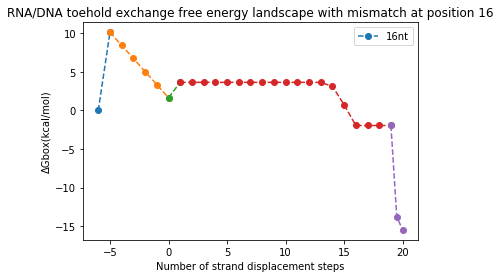

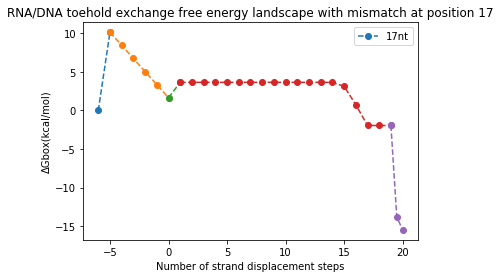

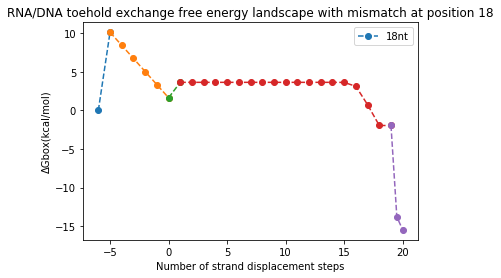

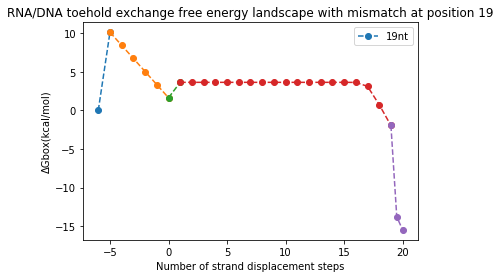

In [5]:
#this is DNA displacing RNA so at the position of the fraying it is DNA on DNA but the rest of the time it is
#fraying is likely to be less likely due to the fact that it is RNA dissociating from DNA
for m in range (1, 20):
    dGboxAinc= 0
    dGboxB1inc = dGassoc + dGvol + dGbp
    dGboxBrinc = np.empty(g2)
    for to in range(g2): 
        dGboxBrinc [to] = dGboxB1inc + dGbp*to
    dGboxC1inc = dGassoc + dGvol + dGbp*g2
    dGfray = np.empty(m-1)
    dGn = np.empty(m-1)
    for state in range(1, m): 
        dGclosed = dGmm
        dGfray[state - 1] = (m - state)*(dGbp + dGrd)
        dGm = dGboxC1inc + R*temp *np.log(np.exp((m*dGbp)/(R*temp)) + np.exp(-(dGmm - dGp)/(R*temp)))
        dGn[state - 1] = dGm - (R*temp*np.log(np.exp(dGfray[state - 1]/(R*temp)) + np.exp((-dGmm)/(R*temp))))
        
    dG_mis_pos = np.empty(b-1)
    dG_mis_pos[:m-1] = dGn
    dG_mis_pos[m-1:b] = dGm
    
#dGboxCrinc = np.empty(m-1)
#dGboxChinc = np.empty(m-1)
#dGboxCrincam = np.empty(b-m)
#dGboxChincam = np.empty(b-m)
#for br in range(m-1): 
    #dGboxChinc[br] = dGboxCh1inc - dGrd*br
    #dGboxCrinc[br] = dGboxChinc[br] - dGs
    #dGboxChincm = dGboxCrinc[m-2] + dGmm - (dGs) #- dGrd)
#for br in range(m-1, b-1): 
    #dGboxChincam[br-(m-1)] = dGboxChincm - dGrd*(br - (m-1))
    #dGboxCrincam[br-(m-1)] = dGboxChincam[br-(m-1)] - dGs
    dGboxDinc = dGm
    dGboxEinc = dGboxDinc - dGvol - dGassoc
    dGboxFinc = dGboxEinc + dGbp


#dGboxCinc = np.empty(b*2)
#dGboxCinc[0:(m-1)*2] = [i for j in zip(dGboxChinc, dGboxCrinc) for i in j]
#dGboxCinc[(m-1)*2:(b-1)*2] = [i for j in zip(dGboxChincam, dGboxCrincam) for i in j]
    dGboxAB1inc = [dGboxAinc, dGboxB1inc] 
    dGboxC1Cr1inc = [dGboxC1inc, dG_mis_pos[0]]

    plt.figure()
    plt.plot(range(-g2,-g2+2), dGboxAB1inc, '--', marker = 'o', label = str(m) + 'nt' )
    plt.plot(range(-g2+1, 1), dGboxBrinc, '--', marker = 'o')
    plt.plot(np.arange(0, 2), dGboxC1Cr1inc, '--', marker = 'o')
    plt.plot(np.arange(1, b), dG_mis_pos, '--', marker = 'o')
    plt.plot([b-1, b-0.5, b], [dGboxDinc, dGboxEinc, dGboxFinc],'--', marker = 'o')

    plt.xlabel('Number of strand displacement steps')
    plt.ylabel('\u0394Gbox(kcal/mol)')
    plt.title('RNA/DNA toehold exchange free energy landscape with mismatch at position ' + str(m))
    plt.legend()
    plt.show()

[-0.02654279]
[-0.0264963  0.9735037  1.9735037  2.9735037  3.9735037  4.9735037
  5.9735037  6.9735037  7.9735037  8.9735037  9.9735037 10.9735037
 11.9735037 12.9735037 13.9735037 14.9735037 15.9735037 16.9735037]
[-0.0264963  6.2735037  0.9735037  7.2735037  1.9735037  8.2735037
  2.9735037  9.2735037  3.9735037 10.2735037  4.9735037 11.2735037
  5.9735037 12.2735037  6.9735037 13.2735037  7.9735037 14.2735037
  8.9735037 15.2735037  9.9735037 16.2735037 10.9735037 17.2735037
 11.9735037 18.2735037 12.9735037 19.2735037 13.9735037 20.2735037
 14.9735037 21.2735037 15.9735037 22.2735037 16.9735037 23.2735037
 23.2735037 17.9735037  0.       ]


ValueError: x and y must have same first dimension, but have shapes (37,) and (38,)

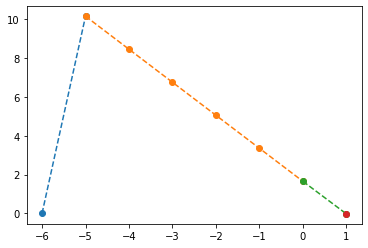

In [62]:
for m in range (1, 20):
    dGboxAinc= 0
    dGboxB1inc = dGassoc + dGvol + dGbp
    dGboxBrinc = np.empty(g2)
    for to in range(g2): 
        dGboxBrinc [to] = dGboxB1inc + dGbp*to
    dGboxC1inc = dGassoc + dGvol + dGbp*g2
    #dGboxCh1inc = dGboxC1inc + dGp + dGs
    dGfray = np.empty(m)
    dGn = np.empty(m)
    for state in range(1, m+1): 
        dGclosed = dGmm
        dGfray[state - 1] = (m - state)*(dGbp + dGrd)
        dGm = dGboxC1inc + R*temp *np.log(np.exp((m*dGbp)/(R*temp)) + np.exp(-(dGmm - dGp)/(R*temp)))
        dGn[state - 1] = dGm - (R*temp*np.log(np.exp(dGfray[state - 1]/(R*temp)) + np.exp((-dGmm)/(R*temp))))
        
    dG_mis_pos = np.empty(m)
    dG_mis_pos[:m] = dGn
    
    dGboxCrinc = np.empty(m-1)
    dGboxChinc = np.empty(m-1)
    dGboxCrincam = np.empty(b-m-1)
    dGboxChincam = np.empty(b-m-1)
    if m < 3:
        for br in range(m, b-1): 
            #dGboxChincam[br-(m-1)] = dGboxChincm - dGrd*(br - (m-1))
            dGboxCrincam[br-(m)] = dGm - dGrd*(br - (m))
            dGboxChincam[br-(m)] = dGboxCrincam[br-(m)] + dGs - dGrd

        dGboxDinc = dGboxChincam[-1] - dGs 
        dGboxEinc = dGboxDinc - dGvol - dGassoc
        dGboxFinc = dGboxEinc + dGbp
             
        print(dG_mis_pos)
        print(dGboxCrincam)
        dGboxCinc = np.empty((b-1)*2-(m-1)*2 + 1)
        dGboxCinc[0:m] = dG_mis_pos[0:m]
        dGboxCinc[m-1:(b-1)*2-m*2:2] = dGboxCrincam
        dGboxCinc[m:(b-1)*2-m:2] = dGboxChincam
        dGboxCinc[(b-1)*2 - 1] = dGboxDinc
        dGboxC1Ch1inc = [dGboxC1inc, dG_mis_pos[0]] 

        print(dGboxCinc)
        plt.figure()
        plt.plot(range(-g2,-g2+2), dGboxAB1inc, '--', marker = 'o', label = str(m) + 'nt' )
        plt.plot(range(-g2+1, 1), dGboxBrinc, '--', marker = 'o')
        plt.plot(np.arange(0, 2), dGboxC1Ch1inc, '--', marker = 'o')
        plt.plot(np.arange(1, 1+m), dGboxCinc[0:m], '--', marker = 'o')
        plt.plot(np.arange(m, b-0.5, 0.5), dGboxCinc[m:], '--', marker = 'o')
        plt.plot([b-1, b-0.5, b], [dGboxDinc, dGboxEinc, dGboxFinc],'--', marker = 'o')

        plt.xlabel('Number of strand displacement steps')
        plt.ylabel('\u0394Gbox(kcal/mol)')
        plt.title('RNA/DNA toehold exchange free energy landscape with mismatch at position ' + str(m))
        plt.legend()
        plt.show()
    else: 
        for br in range(m-3):
            dGboxChinc[br] = dG_mis_pos[0] + dGs - dGrd*br
            #dGboxChinc[br] = dGboxCh1inc - dGrd*br
            dGboxCrinc[br] = dGboxChinc[br] - dGs
            #dGboxChincm = dGboxCrinc[m-2] + dGmm - (dGs) #- dGrd)
        for br in range(m-1, b): 
            #dGboxChincam[br-(m-1)] = dGboxChincm - dGrd*(br - (m-1))
            dGboxChincam[br-(m-1)] = dGm - dGrd*(br - (m-1))
            dGboxCrincam[br-(m-1)] = dGboxChincam[br-(m-1)] - dGs
        dGboxDinc = dGboxChincam[-1] - dGs
        dGboxEinc = dGboxDinc - dGvol - dGassoc
        dGboxFinc = dGboxEinc + dGbp
    
    
        dGboxCinc = np.empty((b-1)*2)
        dGboxCinc[m-3:m-1] = dG_mis_pos[m-3:m-1]
        dGboxCinc[0:(m-1)*2] = [i for j in zip(dGboxChinc, dGboxCrinc) for i in j]
        dGboxCinc[(m-1)*2:(b-1)*2] = [i for j in zip(dGboxChincam, dGboxCrincam) for i in j]
        dGboxC1Ch1inc = [dGboxC1inc, dG_mis_pos[0]]  
        
    dGboxAB1inc = [dGboxAinc, dGboxB1inc] 


    plt.figure()
    plt.plot(range(-g2,-g2+2), dGboxAB1inc, '--', marker = 'o', label = str(m) + 'nt' )
    plt.plot(range(-g2+1, 1), dGboxBrinc, '--', marker = 'o')
    plt.plot(np.arange(0, 1, 0.5), dGboxC1Ch1inc, '--', marker = 'o')
    plt.plot(np.arange(0.5, b-0.5, 0.5), dGboxCinc, '--', marker = 'o')
    plt.plot([b-1, b-0.5, b], [dGboxDinc, dGboxEinc, dGboxFinc],'--', marker = 'o')

    plt.xlabel('Number of strand displacement steps')
    plt.ylabel('\u0394Gbox(kcal/mol)')
    plt.title('RNA/DNA toehold exchange free energy landscape with mismatch at position ' + str(m))
    plt.legend()
    plt.show()